In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import umap

In [3]:
with open("./data/title_pdo_embeds_reduced.pkl", "rb") as embed_file:
    embeddings = pickle.load(embed_file)

In [4]:
embeddings.keys()

dict_keys(['project_ids', 'sentences', 'embeddings', 'pca', 'tsne', 'umap_from_full', 'umap_from_pca'])

In [5]:
redo_title_pdo_pca = False

if redo_title_pdo_pca:
    embeds = embeddings["embeddings"]

    pca = PCA().fit(embeds)

    exp_var = np.cumsum(pca.explained_variance_ratio_)

    plt.plot(exp_var)
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')

    # typiically going to use 100 as a good trade-off
    for i in range(10, 300, 20):
        print(i, ": ", exp_var[i], " gain: ", exp_var[i] - exp_var[i - 10])
        
    tsne = TSNE(n_components = 2, perplexity = 10, random_state = 6, 
                    learning_rate = 1000, n_iter = 1500)
    
    print("Conducting PCA...")
    embeds_pca = PCA(n_components = 100).fit_transform(embeds)
    
    print("Conducting TSNE...")
    embeds_tsne = tsne.fit_transform(embeds_pca)
    
    reducer = umap.UMAP()
    print("Conducting UMAP (1)")
    embeds_umap_from_pca = reducer.fit_transform(embeds_pca)
    print("Conducting UMAP (2)")
    embeds_umap_from_full = reducer.fit_transform(embeddings["embeddings"])
    
    embeddings["pca"] = embeds_pca
    embeddings["tsne"] = embeds_tsne
    
    embeddings["umap_from_full"] = full_umap_dload
    embeddings["umap_from_pca"] = low_dim_embed
    
    with open("./data/title_pdo_embeds_reduced.pkl", "wb") as fout:
        pickle.dump(embeddings, fout)

else:
    embeds_pca = embeddings["pca"]
    embeds_tsne = embeddings["tsne"]
    embeds_umap_from_pca = embeddings["umap_from_pca"]
    embeds_umap_from_full = embeddings["umap_from_full"]

In [6]:
embeddings.keys()

dict_keys(['project_ids', 'sentences', 'embeddings', 'pca', 'tsne', 'umap_from_full', 'umap_from_pca'])

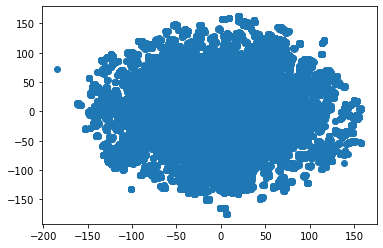

In [7]:
plt.scatter(x=embeds_tsne[:, 0], y=embeds_tsne[:, 1])

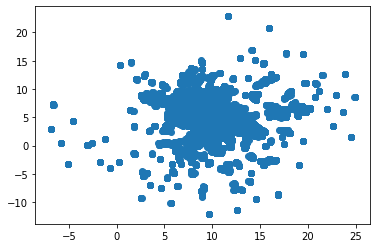

In [8]:
plt.scatter(x=embeds_umap_from_pca[:, 0], y=embeds_umap_from_pca[:, 1])

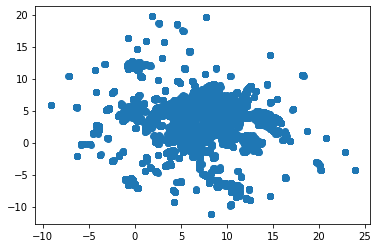

In [9]:
plt.scatter(x=embeds_umap_from_full[:, 0], y=embeds_umap_from_full[:, 1])

## Now DLIs too

In [10]:
with open("./data/dli_embeddings_reduced.pkl", "rb") as dli_embed_file:
    dli_embeds = pickle.load(dli_embed_file)
    
dli_embed_wide = dli_embeds['embedded_dlis']
dli_embeds.keys()

dict_keys(['project_ids', 'embedded_dlis', 'pca', 'tsne', 'umap_from_pca', 'umap_from_full'])

In [11]:
examine_dli_pca = False

if examine_dli_pca:
    dli_pca = PCA().fit(dli_embed_wide)
    dli_exp_var = np.cumsum(dli_pca.explained_variance_ratio_)

    plt.plot(dli_exp_var)
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    
    for i in range(10, 200, 10):
        print(i, ": ", dli_exp_var[i], " gain: ", dli_exp_var[i] - dli_exp_var[i - 10])
        
    print("Number above 0.01: ", len(dli_pca.explained_variance_ratio_[dli_pca.explained_variance_ratio_ > 0.01]))
    print("Number above 0.005: ", len(dli_pca.explained_variance_ratio_[dli_pca.explained_variance_ratio_ > 0.005]))

In [16]:
redo_dli_reduction = False

if redo_dli_reduction:
    # using 45 at present, as balance of throwing out too much and retaining noise
    print("Running DLI PCA")
    dli_embed_pca = PCA(n_components=45).fit_transform(dli_embed_wide)
    
    print("Running DLI TSNE")
    dli_tsne = TSNE(n_components = 2, perplexity = 10, random_state = 6, 
                learning_rate = 1000, n_iter = 1500)
    dli_embed_tsne = dli_tsne.fit_transform(dli_embed_pca)
    
    dli_embeds["pca"] = dli_embed_pca
    dli_embeds["tsne"] = dli_embed_tsne
    
    print("Now running UMAP variants")
    dli_reducer = umap.UMAP()
    print("Conducting UMAP (1)")
    dli_embeds_umap_from_pca = dli_reducer.fit_transform(dli_embed_pca)
    print("Conducting UMAP (2)")
    dli_embeds_umap_from_full = dli_reducer.fit_transform(dli_embed_wide)
    
    dli_embeds["umap_from_pca"] = dli_embeds_umap_from_pca
    dli_embeds["umap_from_full"] = dli_embeds_umap_from_full
    
    with open("./data/dli_embeddings_reduced.pkl", "wb") as fout:
        pickle.dump(dli_embeds, fout)
    
else:
    dli_embed_pca = dli_embeds["pca"]
    dli_embed_tsne = dli_embeds["tsne"]
    dli_embeds_umap_from_pca = dli_embeds["umap_from_pca"]
    dli_embeds_umap_from_full = dli_embeds["umap_from_full"]

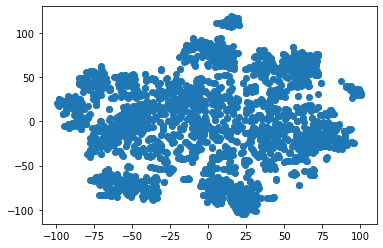

In [13]:
plt.scatter(x=dli_embed_tsne[:, 0], y=dli_embed_tsne[:, 1])

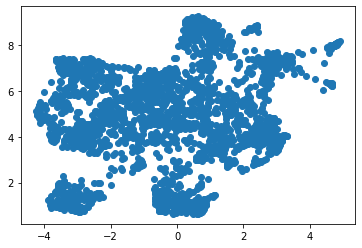

In [14]:
plt.scatter(x=dli_embeds_umap_from_pca[:, 0], y=dli_embeds_umap_from_pca[:, 1])

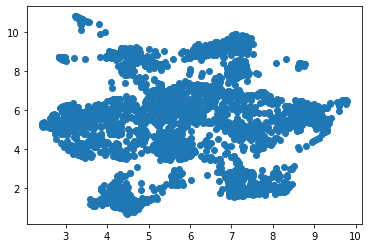

In [17]:
plt.scatter(x=dli_embeds_umap_from_full[:, 0], y=dli_embeds_umap_from_full[:, 1])

## Combine with project sector codes now

In [31]:
proj = pd.read_csv('./data/clean_wb_proj_all.csv', index_col=0)

ind_df = pd.DataFrame(embeddings["project_ids"], columns=["id"])
ind_df = ind_df.merge(proj[["id", "theme1", "sector1"]])
ind_df["theme1"] = ind_df["theme1"].where(lambda x: x.map(x.value_counts()) >= 70, "Other")

parent_sector_df = pd.read_csv('./data/WB_project_sectors.csv')
main_sector_df = parent_sector_df[parent_sector_df.flag_main_sector == 1]
main_sector_df = main_sector_df[main_sector_df["proj_id"].isin(ind_df["id"])]

ind_df = ind_df.merge(main_sector_df[["proj_id", "parent_sector_name"]], how="left", left_on="id", right_on="proj_id")

In [32]:
len(ind_df)

21062

In [43]:
pdo_df = pd.DataFrame(dict(
    id=embeddings["project_ids"], 
    pdo_tsne_x=embeddings["tsne"][:, 0], 
    pdo_tsne_y=embeddings["tsne"][:, 1],
    pdo_umap_p_x=embeddings["umap_from_pca"][:, 0],
    pdo_umap_p_y=embeddings["umap_from_pca"][:, 1],
    pdo_umap_f_x=embeddings["umap_from_full"][:, 0],
    pdo_umap_f_y=embeddings["umap_from_full"][:, 1]
))

In [44]:
dli_embed_df = pd.DataFrame(dict(
    id=dli_embeds["project_ids"], 
    dli_tsne_x=dli_embed_tsne[:, 0], 
    dli_tsne_y=dli_embed_tsne[:, 1],
    dli_umap_p_x=dli_embeds_umap_from_pca[:, 0],
    dli_umap_p_y=dli_embeds_umap_from_pca[:, 1],
    dli_umap_f_x=dli_embeds_umap_from_full[:, 0],
    dli_umap_f_y=dli_embeds_umap_from_full[:, 1]
))

In [45]:
ind_df = ind_df[["id", "parent_sector_name"]].merge(pdo_df)
ind_df = ind_df.merge(dli_embed_df, how='left')

In [46]:
ind_df.head()

,id,parent_sector_name,pdo_tsne_x,pdo_tsne_y,pdo_umap_p_x,pdo_umap_p_y,pdo_umap_f_x,pdo_umap_f_y,dli_tsne_x,dli_tsne_y,dli_umap_p_x,dli_umap_p_y,dli_umap_f_x,dli_umap_f_y
0,P000001,Water/Sanit/Waste,-21.990387,-56.584625,11.996510,3.818677,5.125815,4.427771,NaN,NaN,NaN,NaN,NaN,NaN
1,P000003,Public Admin,-65.625465,46.810818,7.629113,3.646031,6.037426,0.411921,NaN,NaN,NaN,NaN,NaN,NaN
2,P000010,NaN,-57.128330,11.549021,5.182478,3.095370,4.653871,1.687401,NaN,NaN,NaN,NaN,NaN,NaN
3,P000017,Energy & Extractives,-74.429932,121.190636,6.353150,-7.156761,-5.745790,-0.287965,NaN,NaN,NaN,NaN,NaN,NaN
4,P000019,NaN,-47.720516,85.635612,5.932589,5.634479,7.976645,0.618267,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
print(len(dli_embed_df), len(ind_df))

2611 21062


<AxesSubplot:xlabel='dli_tsne_x', ylabel='dli_tsne_y'>

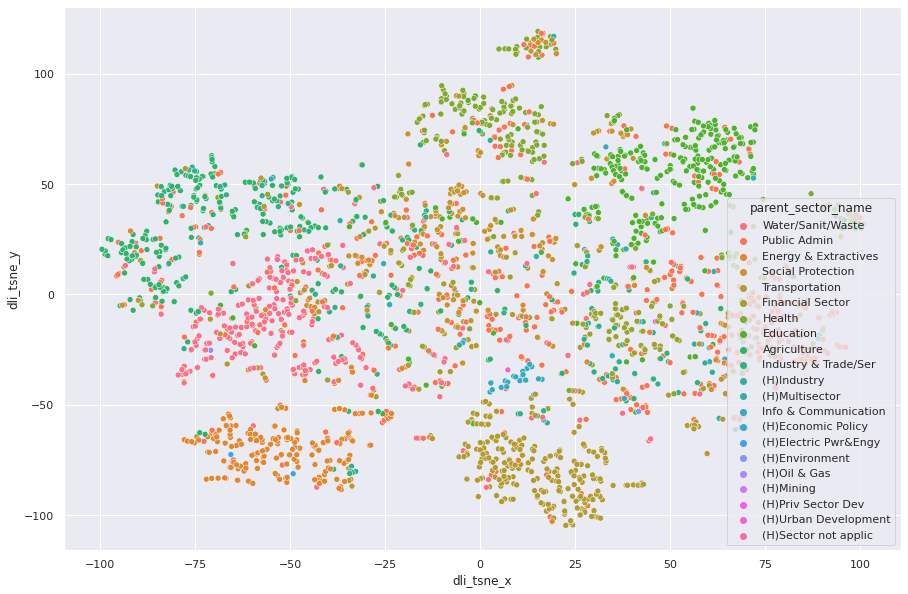

In [49]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(data=ind_df, x="dli_tsne_x", y="dli_tsne_y", hue="parent_sector_name")

<AxesSubplot:xlabel='pdo_tsne_x', ylabel='pdo_tsne_y'>

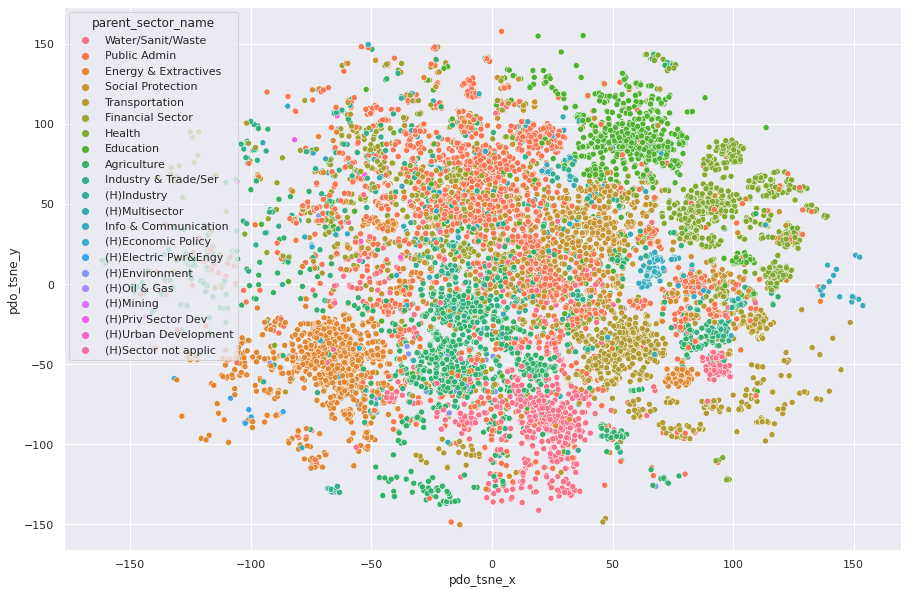

In [50]:
sns.scatterplot(data=ind_df, x="pdo_tsne_x", y="pdo_tsne_y", hue="parent_sector_name")

<AxesSubplot:xlabel='pdo_umap_f_x', ylabel='pdo_umap_f_y'>

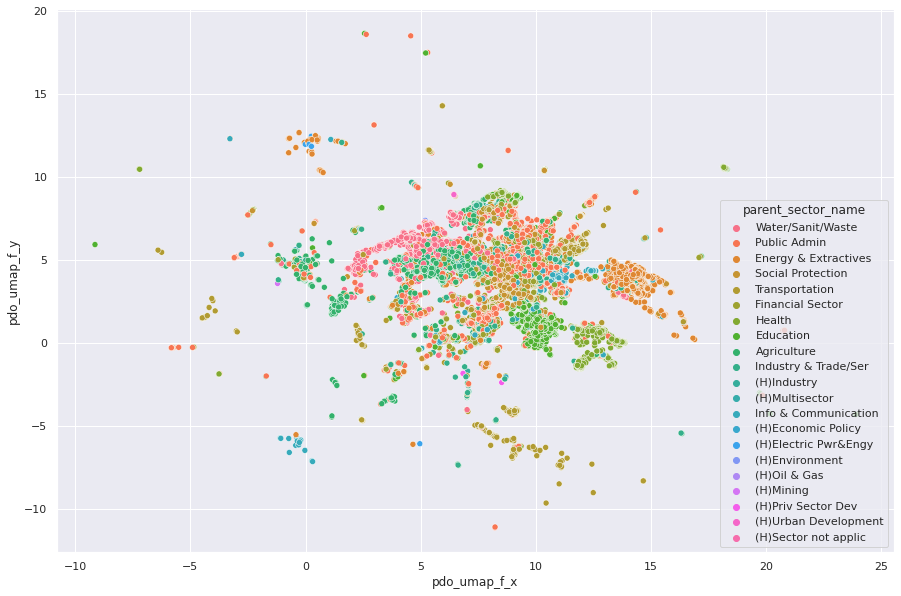

In [52]:
sns.scatterplot(data=ind_df, x="pdo_umap_f_x", y="pdo_umap_f_y", hue="parent_sector_name")

<AxesSubplot:xlabel='pdo_umap_p_x', ylabel='pdo_umap_p_y'>

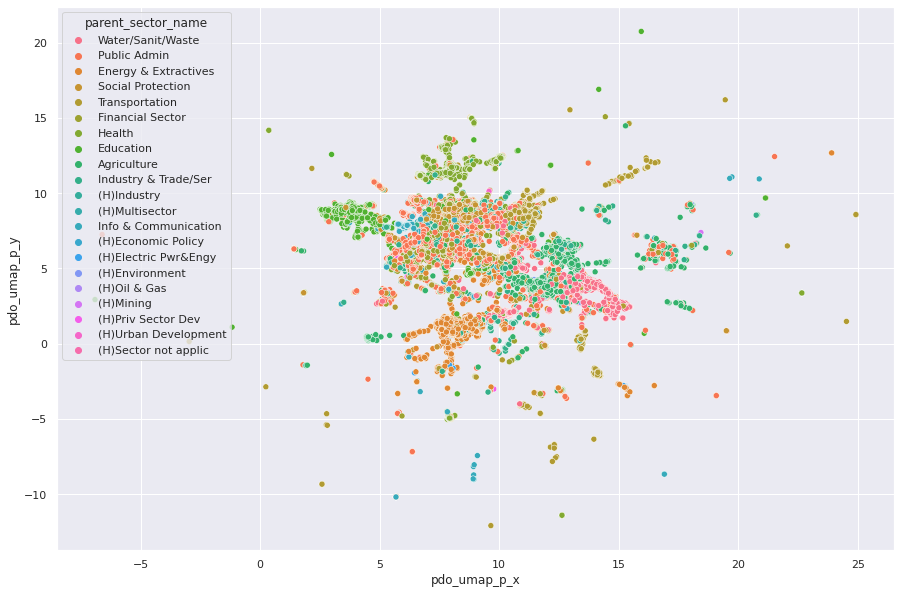

In [53]:
sns.scatterplot(data=ind_df, x="pdo_umap_p_x", y="pdo_umap_p_y", hue="parent_sector_name")

In [54]:
ind_df.to_csv('./data/clean_dli_pdo_embeds_sector.csv', index=False)

In [55]:
ind_df.head()

,id,parent_sector_name,pdo_tsne_x,pdo_tsne_y,pdo_umap_p_x,pdo_umap_p_y,pdo_umap_f_x,pdo_umap_f_y,dli_tsne_x,dli_tsne_y,dli_umap_p_x,dli_umap_p_y,dli_umap_f_x,dli_umap_f_y
0,P000001,Water/Sanit/Waste,-21.990387,-56.584625,11.996510,3.818677,5.125815,4.427771,NaN,NaN,NaN,NaN,NaN,NaN
1,P000003,Public Admin,-65.625465,46.810818,7.629113,3.646031,6.037426,0.411921,NaN,NaN,NaN,NaN,NaN,NaN
2,P000010,NaN,-57.128330,11.549021,5.182478,3.095370,4.653871,1.687401,NaN,NaN,NaN,NaN,NaN,NaN
3,P000017,Energy & Extractives,-74.429932,121.190636,6.353150,-7.156761,-5.745790,-0.287965,NaN,NaN,NaN,NaN,NaN,NaN
4,P000019,NaN,-47.720516,85.635612,5.932589,5.634479,7.976645,0.618267,NaN,NaN,NaN,NaN,NaN,NaN
